In [59]:
import re, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in","xtick.top":True,"ytick.right":True,"axes.grid":True})
%matplotlib inline

def read_file(filename):
    lines = []
    with open (filename, "r") as myfile:
        lines = [line.rstrip('\n') for line in myfile]
    return lines

def calcul_fair(values):
    '''
    @brief:
        calculate fairness
    @params:
        values: a list of values
    '''
    values = np.array(values)
    n = len(values)
    if sum(values) != 0.:
        return pow(sum(values), 2)/(n*sum(pow(values, 2)))
    else:
        return 1.

# Unit Test

In [36]:
# unit test

n_as = 64
method = 'geom-w'
rate = 0.845
ep = 0
dirname = os.path.join("../data/simulation", "log-dump-all","2lb-64as-1worker-1stage-exp-0.50cpumu", method, "rate{:.3f}".format(rate), "")
filename = os.path.join(dirname, 'test.log'.format(ep))

In [38]:
!ls $filename

../data/simulation/log-dump-all/2lb-64as-1worker-1stage-exp-0.50cpumu/geom-w/rate0.845/test.log


In [43]:
lines = [l for l in read_file(filename) if 'Periodic' in l]

In [64]:
fair_list = []
ratio_lo, ratio_hi = 0.01, 0.99
for l in lines[int(ratio_lo*len(lines)):int(ratio_hi*len(lines))]:
    t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
    fair_list.append(calcul_fair(t_rest_list))

In [ ]:
for method in methods

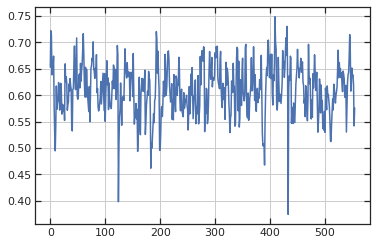

In [62]:
plt.plot(fair_list)

# Run all

In [92]:
rates = [0.645, 0.765, 0.845, 0.925, 1.]
methods = ["gsq", "gsq2","geom","geom-w","ecmp","wcmp"]
ratio_lo, ratio_hi = 0.05, 0.95

result = {}
result_grp1 = {}
result_grp2 = {}

for rate in rates:
    result[rate] = {}
    result_grp1[rate] = {}
    result_grp2[rate] = {}
    for method in methods:
        dirname = os.path.join("../data/simulation", "log-dump-all","2lb-64as-1worker-1stage-exp-0.50cpumu", method, "rate{:.3f}".format(rate), "")
        filename = os.path.join(dirname, 'test.log'.format(ep))
        
        all_lines = [l for l in read_file(filename)]
        start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
        end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
        assert len(start_idx) == len(end_idx)
        n_ep = len(start_idx)
        fair_list = []
        fair_grp1_list = []
        fair_grp2_list = []
        for ep in range(n_ep):
            lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Periodic' in l]
            for l in lines[int(ratio_lo*len(lines)):int(ratio_hi*len(lines))]:
                t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
                fair_list.append(calcul_fair(t_rest_list))
                fair_grp1_list.append(calcul_fair(t_rest_list[:32]))
                fair_grp2_list.append(calcul_fair(t_rest_list[32:]))
                
        result[rate][method] = fair_list
        result_grp1[rate][method] = fair_grp1_list
        result_grp2[rate][method] = fair_grp2_list

rate=0.645 | method=gsq | Fairness Index 0.592 (grp1 0.660, grp2 0.663)
rate=0.645 | method=gsq2 | Fairness Index 0.539 (grp1 0.604, grp2 0.631)
rate=0.645 | method=geom | Fairness Index 0.511 (grp1 0.576, grp2 0.625)
rate=0.645 | method=geom-w | Fairness Index 0.515 (grp1 0.605, grp2 0.553)
rate=0.645 | method=ecmp | Fairness Index 0.343 (grp1 0.508, grp2 0.603)
rate=0.645 | method=wcmp | Fairness Index 0.431 (grp1 0.545, grp2 0.411)


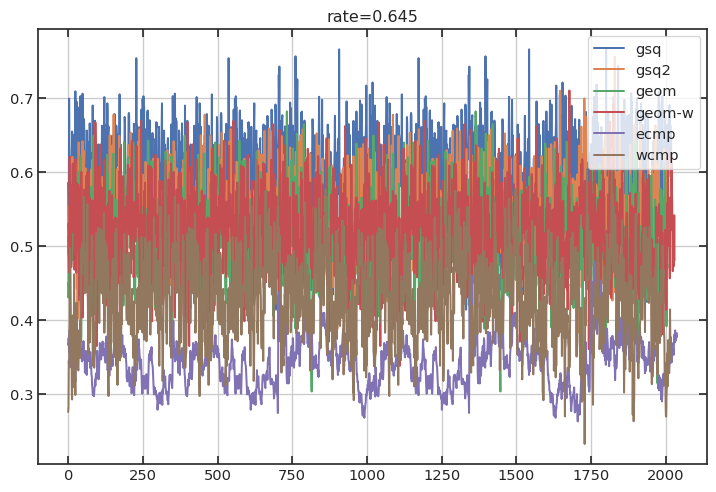

rate=0.765 | method=gsq | Fairness Index 0.644 (grp1 0.718, grp2 0.725)
rate=0.765 | method=gsq2 | Fairness Index 0.591 (grp1 0.658, grp2 0.711)
rate=0.765 | method=geom | Fairness Index 0.573 (grp1 0.634, grp2 0.713)
rate=0.765 | method=geom-w | Fairness Index 0.562 (grp1 0.653, grp2 0.626)
rate=0.765 | method=ecmp | Fairness Index 0.467 (grp1 0.538, grp2 0.869)
rate=0.765 | method=wcmp | Fairness Index 0.468 (grp1 0.571, grp2 0.470)


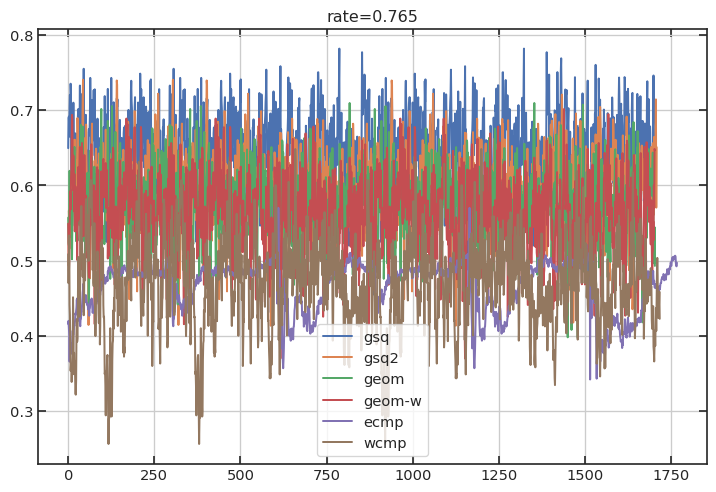

rate=0.845 | method=gsq | Fairness Index 0.675 (grp1 0.754, grp2 0.760)
rate=0.845 | method=gsq2 | Fairness Index 0.629 (grp1 0.692, grp2 0.768)
rate=0.845 | method=geom | Fairness Index 0.603 (grp1 0.675, grp2 0.762)
rate=0.845 | method=geom-w | Fairness Index 0.614 (grp1 0.694, grp2 0.690)
rate=0.845 | method=ecmp | Fairness Index 0.493 (grp1 0.554, grp2 0.922)
rate=0.845 | method=wcmp | Fairness Index 0.485 (grp1 0.565, grp2 0.509)


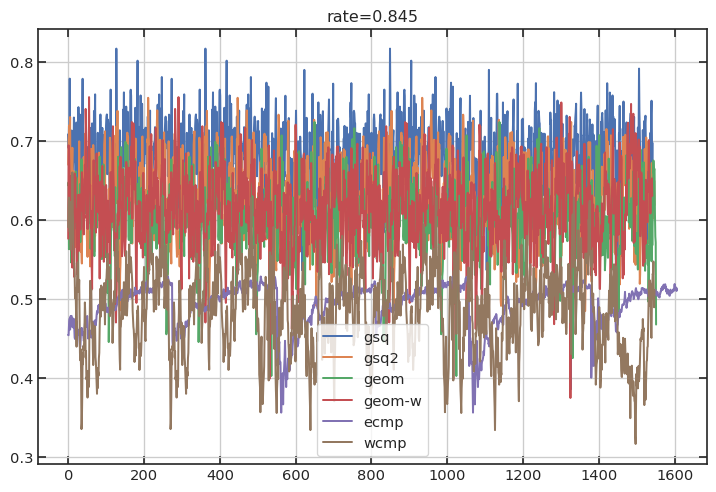

rate=0.925 | method=gsq | Fairness Index 0.693 (grp1 0.774, grp2 0.786)
rate=0.925 | method=gsq2 | Fairness Index 0.665 (grp1 0.739, grp2 0.819)
rate=0.925 | method=geom | Fairness Index 0.655 (grp1 0.732, grp2 0.830)
rate=0.925 | method=geom-w | Fairness Index 0.659 (grp1 0.740, grp2 0.745)
rate=0.925 | method=ecmp | Fairness Index 0.513 (grp1 0.548, grp2 0.953)
rate=0.925 | method=wcmp | Fairness Index 0.537 (grp1 0.578, grp2 0.554)


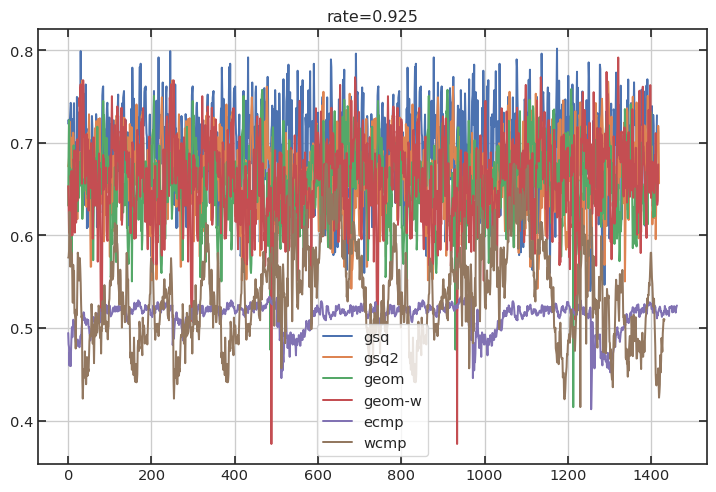

rate=1.000 | method=gsq | Fairness Index 0.754 (grp1 0.841, grp2 0.845)
rate=1.000 | method=gsq2 | Fairness Index 0.741 (grp1 0.824, grp2 0.901)
rate=1.000 | method=geom | Fairness Index 0.736 (grp1 0.830, grp2 0.906)
rate=1.000 | method=geom-w | Fairness Index 0.762 (grp1 0.852, grp2 0.861)
rate=1.000 | method=ecmp | Fairness Index 0.517 (grp1 0.563, grp2 0.953)
rate=1.000 | method=wcmp | Fairness Index 0.625 (grp1 0.684, grp2 0.651)


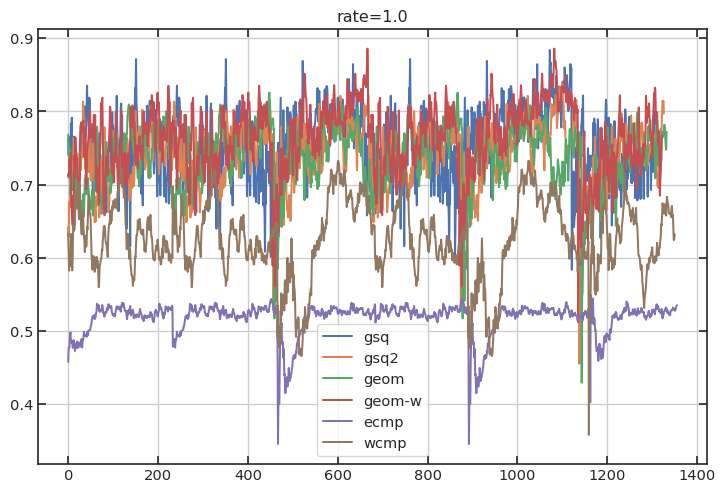

In [93]:
for rate, tuples in result.items():
    fig = plt.figure(figsize=(9, 6), dpi=96)
    for method, values in tuples.items():
        plt.plot(values, label=method)
        print('rate={:.3f} | method={} | Fairness Index {:.3f} (grp1 {:.3f}, grp2 {:.3f})'.format(rate, method, np.mean(values), np.mean(result_grp1[rate][method]), np.mean(result_grp2[rate][method])))
    plt.legend()
    plt.title('rate={}'.format(rate))
    plt.show()